## Project Foundations for Data Science: FoodHub Data Analysis

## Author: Stefani DW Yates

### Context

The number of restaurants in New York is increasing daily. Due to their hectic lifestyles, many students and busy professionals rely on those restaurants. An online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company, FoodHub, offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after the restaurant confirms it. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants, which will help them enhance their customer experience. Suppose you are hired as a Data Scientist in this company, and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.

### Data Description

The data contains different data related to food orders. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday, and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: The time (in minutes) it takes the restaurant to prepare the food. This is calculated by subtracting the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) the delivery person takes to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install ace_tools_open

In [ ]:
### Import Required Libraries

# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import ace_tools_open as tools
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


### Load and Inspect Data

# Load the dataset
df = pd.read_csv('foodhub_order.csv')

# Display the first few rows
df.head()

# Basic information about the dataset, including summary statistics and missing values
dataset_info = df.info()
summary_stats = df.describe()
missing_values = df.isnull().sum()

# Summary stats
summary_stats_formatted = summary_stats.T  # Transposed for easier readability

# Missing values
missing_values_formatted = pd.DataFrame(missing_values, columns=["Missing Values"])
missing_values_formatted['Percentage'] = (missing_values_formatted['Missing Values'] / len(df)) * 100

# Display the formatted summary stats and missing values
tools.display_dataframe_to_user(name="Summary Statistics", dataframe=summary_stats_formatted)
tools.display_dataframe_to_user(name="Missing Values", dataframe=missing_values_formatted)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
Summary Statistics


Missing Values


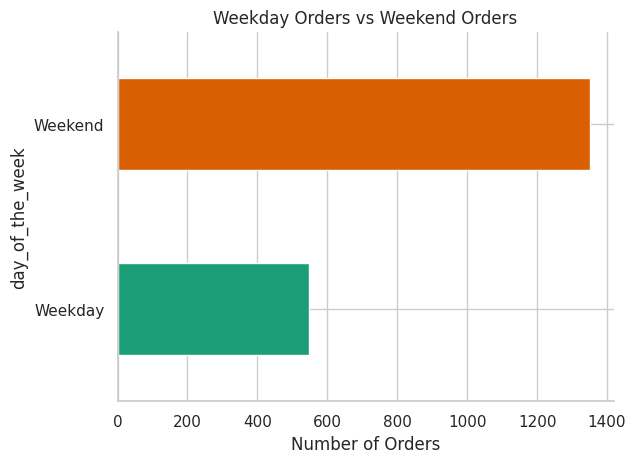

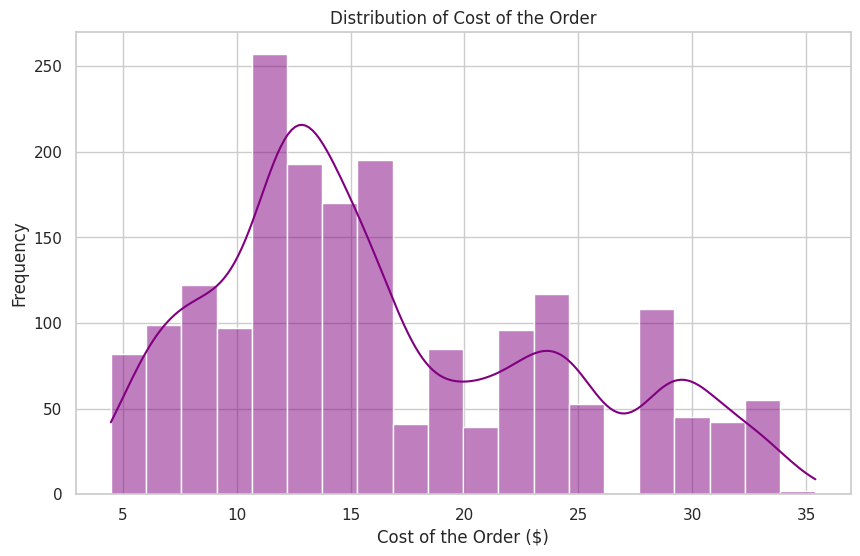

In [ ]:
### Univariate Analysis

#### Distribution of Orders by Day and by Cost

# Count of orders based on day_of_the_week (weekday vs weekend)
orders_by_day = df['day_of_the_week'].value_counts()

# Number of order by weekday/weekend
df.groupby('day_of_the_week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Weekday Orders vs Weekend Orders')
plt.xlabel('Number of Orders')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Plot the frequency
plt.figure(figsize=(10, 6))
sns.histplot(df['cost_of_the_order'], kde=True, bins=20, color=('darkblue'))
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Frequency')
plt.show()

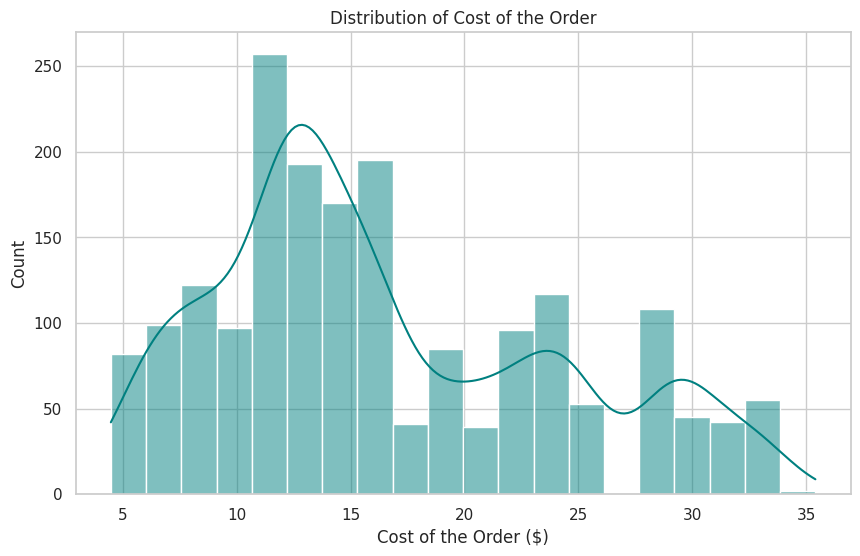

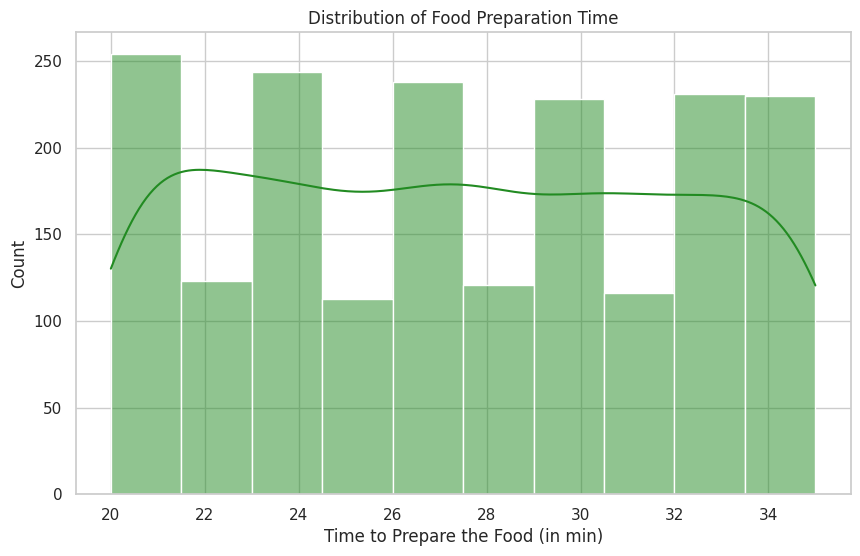

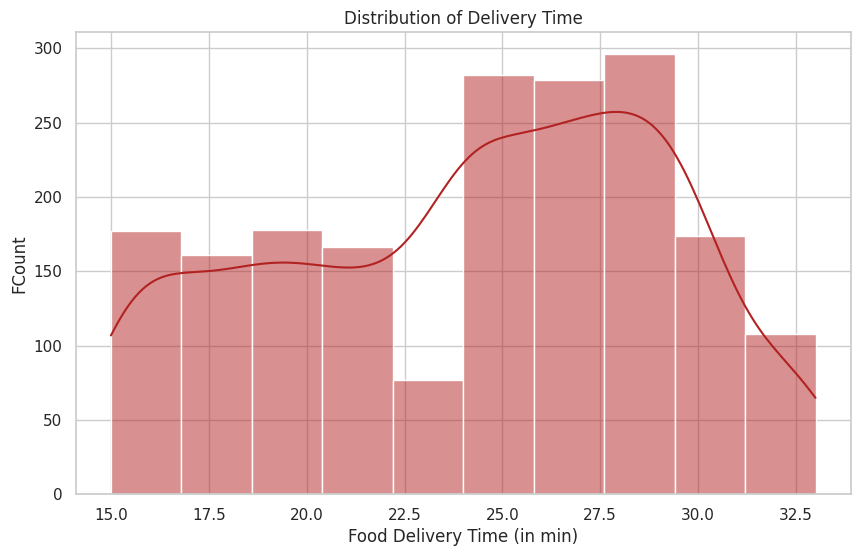

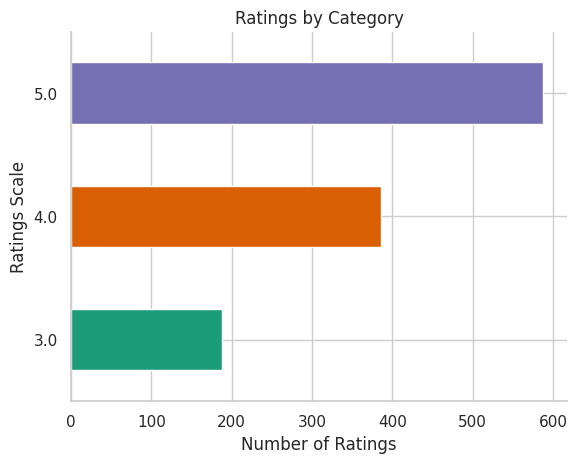

In [ ]:
# Replace "Not given" in the rating column with NaN to handle missing ratings
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Perform univariate analysis of the key numerical variables
univariate_stats = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].describe()

# Display univariate statistics
univariate_stats

# Cost of the order
plt.figure(figsize=(10, 6))
sns.histplot(df['cost_of_the_order'], kde=True, bins=20, color=('forestgreen'))
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order ($)')
plt.ylabel('Count')
plt.show()

# Food preparation time
plt.figure(figsize=(10, 6))
sns.histplot(df['food_preparation_time'], kde=True, bins=10, color=('firebrick'))
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Time to Prepare the Food (in min)')
plt.ylabel('Count')
plt.show()

# Delivery time
plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_time'], kde=True, bins=10, color=('teal'))
plt.title('Distribution of Delivery Time')
plt.xlabel('Food Delivery Time (in min)')
plt.ylabel('FCount')
plt.show()

# Rating
df.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Ratings by Category')
plt.xlabel('Number of Ratings')
plt.ylabel('Ratings Scale')
plt.gca().spines[['top', 'right',]].set_visible(False)

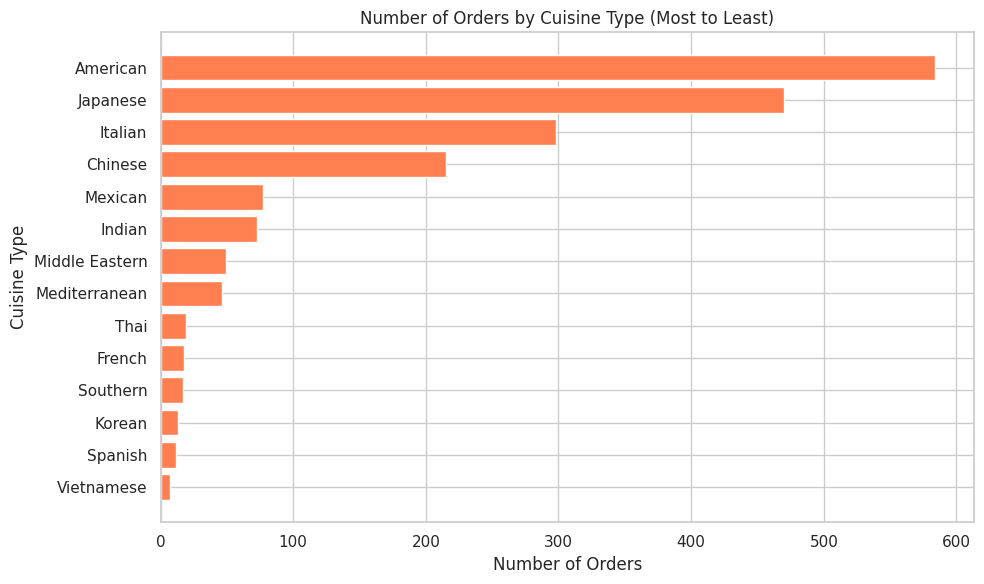

In [ ]:
#### Cuisine Type

cuisine_order_count = df.groupby('cuisine_type')['order_id'].count().reset_index()

# Sort in descending order
cuisine_order_count_sorted = cuisine_order_count.sort_values(by='order_id', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(cuisine_order_count_sorted['cuisine_type'][::-1], cuisine_order_count_sorted['order_id'][::-1], color='coral')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.title('Number of Orders by Cuisine Type (Most to Least)')
plt.tight_layout()
plt.show()

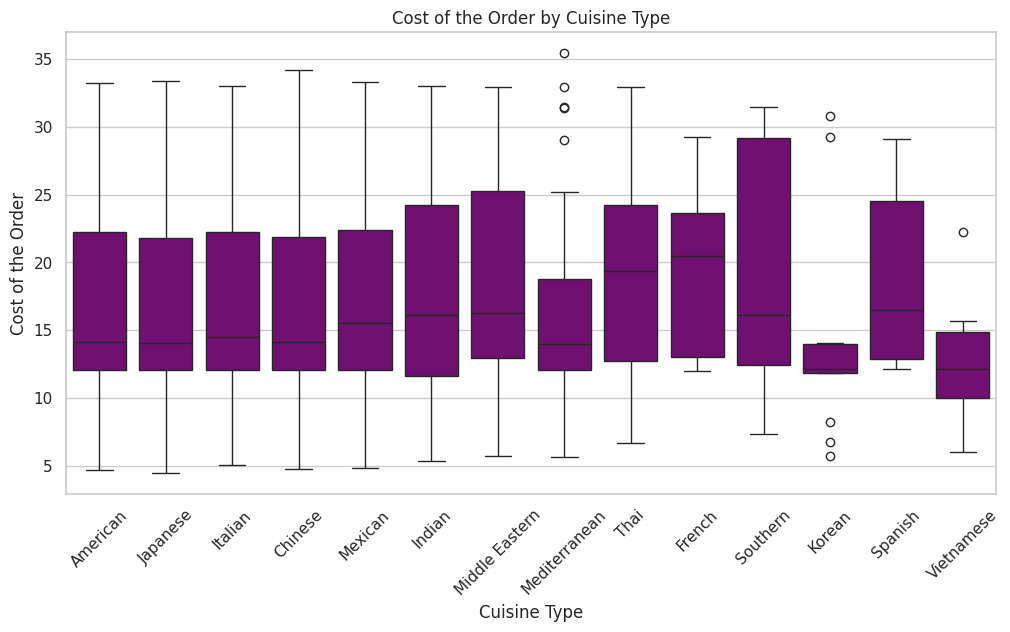

In [ ]:
### Multivariate Analysis

#### Cost of the Order by Cuisine Type

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', order=df['cuisine_type'].value_counts().index, color=('purple'))
plt.title('Cost of the Order by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45)
plt.show()

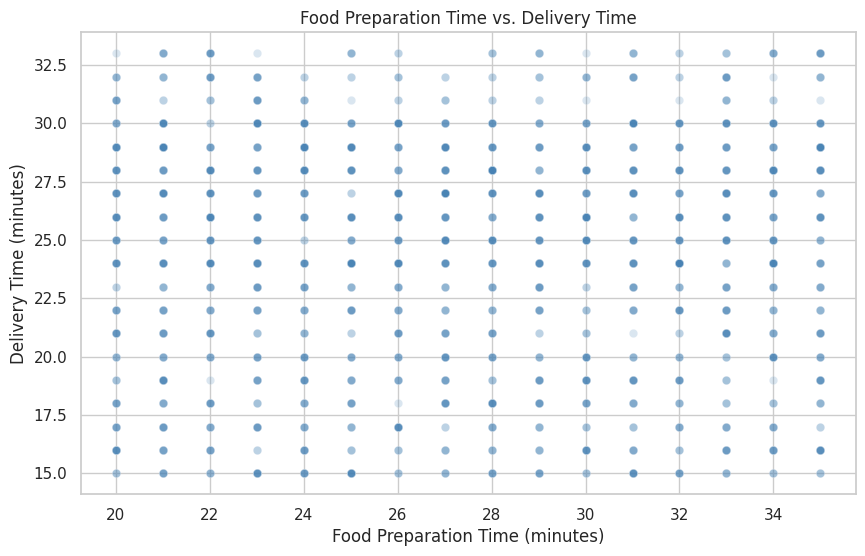

In [ ]:
#### Food Preparation Time vs. Delivery Time

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time', alpha=0.2, color='steelblue')
plt.title('Food Preparation Time vs. Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

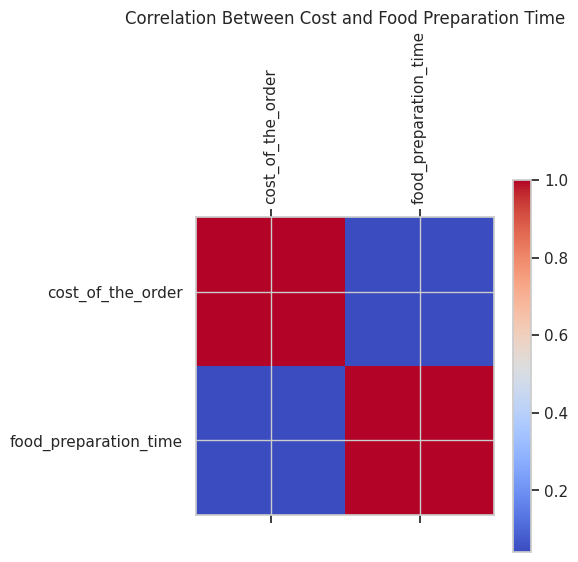

In [ ]:
# Correlation between cost and food preparation time
cost_prep_corr = df[['cost_of_the_order', 'food_preparation_time']].corr()

# Correlation heatmap between cost and food preparation time
plt.matshow(cost_prep_corr, cmap='coolwarm')
plt.xticks(range(len(cost_prep_corr.columns)), cost_prep_corr.columns, rotation=90)
plt.yticks(range(len(cost_prep_corr.columns)), cost_prep_corr.columns)
plt.colorbar()
plt.title('Correlation Between Cost and Food Preparation Time', pad=5)
plt.show()

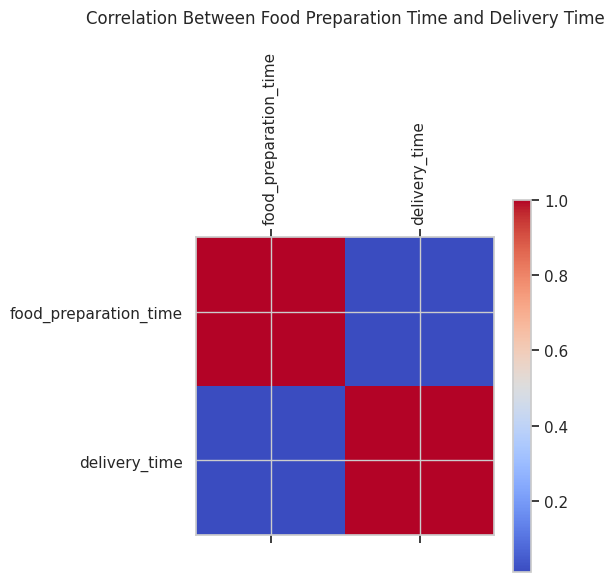

In [ ]:
# Correlation between food preparation time and delivery time
prep_delivery_corr = df[['food_preparation_time', 'delivery_time']].corr()

# Correlation heatmap between food preparation time and delivery time
plt.matshow(prep_delivery_corr, cmap='coolwarm')
plt.xticks(range(len(prep_delivery_corr.columns)), prep_delivery_corr.columns, rotation=90)
plt.yticks(range(len(prep_delivery_corr.columns)), prep_delivery_corr.columns)
plt.colorbar()
plt.title('Correlation Between Food Preparation Time and Delivery Time', pad=20)
plt.show()

In [ ]:
# Convert the 'rating' column to numeric, forcing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
restaurant_rating = df.groupby(['restaurant_name'])['rating'].mean().reset_index()
restaurant_rating = restaurant_rating.dropna()

# Sort the data to find the top 5 and bottom 5 restaurants based on rating
top_5_restaurants = restaurant_rating.sort_values(by='rating', ascending=False).head(5)
bottom_5_restaurants = restaurant_rating.sort_values(by='rating', ascending=True).head(5)

# Check if there's a difference in rating between weekdays and weekends
rating_day_restaurant = df.groupby(['restaurant_name', 'day_of_the_week'])['rating'].mean().reset_index()
rating_day_restaurant = rating_day_restaurant.dropna()

# Pivot the data to see rating difference between Weekday and Weekend for each restaurant
rating_comparison = rating_day_restaurant.pivot(index='restaurant_name', columns='day_of_the_week', values='rating')

# Display the top 5 restaurants, bottom 5 restaurants, and a preview of the rating comparison table
tools.display_dataframe_to_user(name="Top 5 Restaurants", dataframe=top_5_restaurants)
tools.display_dataframe_to_user(name="Bottom 5 Restaurants", dataframe=bottom_5_restaurants)
tools.display_dataframe_to_user(name="Rating Comparison by Day", dataframe=rating_comparison.head())

Top 5 Restaurants


Bottom 5 Restaurants


Rating Comparison by Day




---



---


# **Observations**

**Cuisine Analysis**
> The number of orders varies by cuisine type, with American cuisine leading in
orders, followed by Italian and Chinese. Indian and French cuisines have fewer orders but Indian cuisine receives higher ratings on average.


**Order Size and Cost**

>There is a very weak correlation between order cost and food preparation time, indicating that higher costs do not imply longer preparation times.

**Delivery Time vs Food Preparation Time**

>The correlation between food preparation time and delivery time is weak, meaning that preparation time does not strongly affect delivery speed.

**Weekend vs Weekday Patterns**

>Order volume and costs remain relatively stable between weekends and weekdays, with slightly more orders placed on weekends.

**Customer Behavior**

>A small number of customers account for the majority of orders, indicating customer loyalty, though many customers make only one or two orders.
Customer ratings vary, with most ratings falling between 3 and 5, and many customers have not provided ratings.

---

# **Key Insights**
**Cuisine Preferences**
>American cuisine is the most popular, followed by Italian and Chinese. Indian cuisine, despite fewer orders, receives the highest average rating, suggesting high customer satisfaction.

**Order Cost Distribution**
>Most orders cost between \$10 and \$40, with customers preferring moderately priced meals.

**Food Preparation and Delivery**
>Delivery times are not correlated with food preparation times, implying that external factors such as traffic or distance are more likely to impact delivery efficiency.

**Customer Loyalty**
>A small subset of customers is responsible for most orders, showing high repeat engagement. Retaining these customers is key to sustaining business success.

**Weekend Patterns**
>There is a slight increase in order volume on weekends, though the cost remains relatively consistent throughout the week.


---



# **Recommendations**

**Encourage Ratings**
>Offer incentives, such as loyalty points or discounts, for customers to provide ratings. This will help gather more consistent and useful feedback.

**Optimize Delivery Routes**
>Analyze delivery routes to identify areas for improvement and consider implementing route optimization tools to reduce delivery times and improve overall efficiency.

**Weekend Promotions**
>Introduce weekend promotions to further boost sales, particularly targeting high-demand days.

**Cuisine-Specific Strategies**
>Partner with restaurants offering high-demand cuisines like American, Italian, and Chinese. Expand visibility for high-rated but lesser-ordered cuisines like Indian.

**Dynamic Pricing**
>Implement dynamic pricing strategies based on customer behavior, considering the different patterns during weekdays and weekends.

**Customer Retention Strategy**
>Develop loyalty programs to retain high-value customers who frequently place orders. Personalized marketing strategies could further enhance engagement.
________________________________________


# **Next Steps**
**Deeper Analysis of Customer Behavior**
>Conduct further analysis of customer order patterns to identify peak times and explore customer demographics for potential growth areas.

**Partner with Restaurants**
>Collaborate with restaurant partners to improve food preparation times for popular dishes and cuisines, ensuring consistent quality and faster service.

**Improve Delivery Speed**
>Work with delivery providers to optimize delivery logistics, focusing on factors beyond preparation time (e.g., traffic and delivery routing).

**Explore New Opportunities**
>Explore delivery performance by geographical regions to identify areas for optimization and consider expanding to underserved areas with high demand for specific cuisines.


---



---

